In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
chla = np.load("/home/mafzhang/data/MEXICO/8d/chla.npy")

1708905

In [5]:
is_sea = np.load("/home/mafzhang/data/MEXICO/8d/is_sea.npy")
lon = np.load("/home/mafzhang/data/MEXICO/8d/long.npy")
lati = np.load("/home/mafzhang/data/MEXICO/8d/lati.npy")

[[       nan        nan        nan ... 0.0754717  0.07442348 0.07442348]
 [       nan        nan        nan ... 0.06813417 0.06708595 0.06289308]
 [       nan        nan        nan ... 0.07966457 0.07442348 0.07023061]
 ...
 [0.19601677 0.19601677 0.1918239  ...        nan        nan        nan]
 [0.17085954 0.16352201 0.16561845 ...        nan        nan        nan]
 [0.19392034 0.18343816 0.18343816 ...        nan        nan        nan]]
-93.97916412353516 -89.02082824707031
28.520832061767578 29.979164123535156


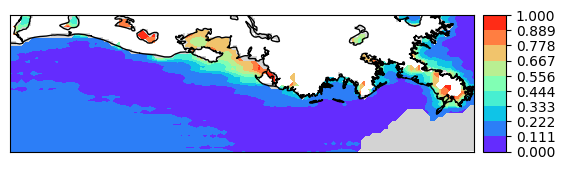

In [13]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
import h5py
from numpy import meshgrid

missing = np.sum(np.isnan(chla),0)/chla.shape[0]
missing[~is_sea.astype(bool)]=np.nan
print(missing)

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
print(lon1, lon2)
print(lati1, lati2)
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='h')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
map.drawcoastlines()
map.contourf(lon, lati, missing, levels=np.linspace(0, 1, 10),cmap="rainbow")
map.colorbar(boundaries=np.linspace(0, 1, 10), ticks=np.linspace(0, 1, 10))

/tmp/ipykernel_293317/1541483664.py:7: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(np.log10(chla),0)


[[        nan         nan         nan ...  0.89833171  0.86380691
   0.82201207]
 [        nan         nan         nan ...  0.90000183  0.86537839
   0.82777861]
 [        nan         nan         nan ...  0.89441481  0.86300211
   0.82686282]
 ...
 [-0.3027051  -0.2994147  -0.30331536 ...         nan         nan
          nan]
 [-0.33666501 -0.33527362 -0.34186559 ...         nan         nan
          nan]
 [-0.3729296  -0.37196143 -0.37814733 ...         nan         nan
          nan]]
-93.97916412353516 -89.02082824707031
28.520832061767578 29.979164123535156


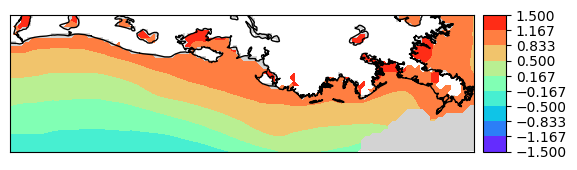

In [18]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
import h5py
from numpy import meshgrid

mean = np.nanmean(np.log10(chla),0)
mean[~is_sea.astype(bool)]=np.nan
print(mean)

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
print(lon1, lon2)
print(lati1, lati2)
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='h')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
map.drawcoastlines()
map.contourf(lon, lati, mean, levels=np.linspace(-1.5, 1.5, 10),cmap="rainbow")
map.colorbar(boundaries=np.linspace(-1.5, 1.5, 10), ticks=np.linspace(-1.5, 1.5, 10))

/home/mafzhang/miniconda3/envs/torch/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


[[       nan        nan        nan ... 0.22173268 0.22108989 0.21417962]
 [       nan        nan        nan ... 0.23158345 0.22884076 0.22652195]
 [       nan        nan        nan ... 0.23279576 0.23512839 0.23393397]
 ...
 [0.27317536 0.27139027 0.27413696 ...        nan        nan        nan]
 [0.27878626 0.27694063 0.27946498 ...        nan        nan        nan]
 [0.27871452 0.28393615 0.28606086 ...        nan        nan        nan]]
-93.97916412353516 -89.02082824707031
28.520832061767578 29.979164123535156


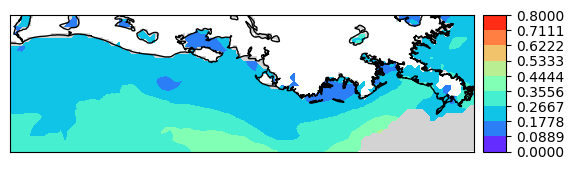

In [20]:
from mpl_toolkits import basemap
from sklearn.cluster import KMeans, DBSCAN, SpectralClustering
import cartopy.crs as ccrs
import h5py
from numpy import meshgrid

std = np.nanstd(np.log10(chla),0)
std[~is_sea.astype(bool)]=np.nan
print(std)

lon1, lon2, lati1, lati2 = lon.min(), lon.max(), lati.min(), lati.max()
print(lon1, lon2)
print(lati1, lati2)
map = basemap.Basemap(llcrnrlon=lon1, llcrnrlat=lati1,urcrnrlon=lon2, urcrnrlat=lati2, projection='cyl', resolution='h')
map.drawlsmask(land_color='white', ocean_color='lightgray', resolution='f',grid=1.25)
map.drawcoastlines()
map.contourf(lon, lati, std, levels=np.linspace(0, 0.8, 10),cmap="rainbow")
map.colorbar(boundaries=np.linspace(0, 0.8, 10), ticks=np.linspace(0, 0.8, 10))

In [53]:
missing = missing.reshape(-1)
missing[635]=0
print(missing.argmax())


764


In [54]:
tmp=np.zeros((36,120))
tmp = tmp.reshape(-1)
tmp[764]=1
tmp = tmp.reshape(36,120)
final = tmp[is_sea]
final.argmax()

151